In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import signac


from scipy.optimize import curve_fit, minimize
#from sklearn.kernel_ridge import KernelRidge
#from joblib import dump, load

#from sklearn.preprocessing import PolynomialFeatures
#from sklearn.linear_model import *



import matplotlib.pylab as pl


from scipy.integrate import simps




In [2]:

#q4s and q3s, only q4s made it into paper due to space limitations
q4spectra = np.load("../spce_interface/q4spectra.npy")
q4T = np.load("../spce_interface/q4T.npy")
q4points = np.load("../spce_interface/q4points.npy")

q3spectra = np.load("../spce_interface/q3spectra.npy")
q3T = np.load("../spce_interface/q3T.npy")
q3points = np.load("../spce_interface/q3points.npy")


#spce instantaneous interface
spce_iidis = np.load("../spce_interface/oil4Odis.npy", allow_pickle=True)
spce_boxW = 55.21996533**2 # box width in Angstrom

spce_coco, bins = np.histogram(np.concatenate(spce_iidis), range = (-2, 10.0), bins = 36) #Making distance histogram
spce_binw = bins[1] - bins[0]
spce_unco = bins[:-1] + spce_binw/2

#amoeba instaneous interface
amoeba_iidis = np.load("../amoeba_interface/Odisses.npy", allow_pickle=True)

amoeba_boxW = 36**2 # box width in Angstrom

amoeba_coco, bins = np.histogram(np.concatenate(amoeba_iidis), range = (-2, 10.0), bins = 36) #Making distance histogram
amoeba_binw = bins[1] - bins[0]
amoeba_unco = bins[:-1] + amoeba_binw/2

#spce fields and spectra
spce_interface_fields = np.load("spce_interface_fields.npy",
                           allow_pickle=True)

spce_interface_fields[[1, 2, 3]] = spce_interface_fields[[3, 1, 2]] # Putting bulk fields first

spce_noshift_spectra = np.load("spce_no_shiftspectra.npy")
spce_noshift_sc_param = np.load("spce_noshift_sc_param.npy")
spce_noshift_sc = np.load("spce_noshift_sc.npy")

spce_sc_param = np.load("spcesc_param.npy")
spce_shift_sc = np.load("spceshift_sc.npy")
spce_collect1 = np.load("spce_spectra_by_distance.npy")

#amoeba fields and spectra
amoeba_interface_fields = np.load("amoeba_interface_fields.npy",
                           allow_pickle=True)

amoeba_interface_fields[[1, 2, 3]] = amoeba_interface_fields[[3, 1, 2]]


amoeba_noshift_sc_param = np.load("amoeba_noshift_sc_param.npy")
amoeba_noshift_sc = np.load("amoeba_noshift_sc.npy")


amoeba_sc_param = np.load("amoeba_sc_param.npy")
amoeba_shift_sc = np.load("amoeba_shift_sc.npy") 
amoeba_collect1 = np.load("amoeba_spectra_by_distance.npy")

#curve is function for fitting curves to Gaussians
curve = lambda freq, h1, h2, h3, f1, f2, f3, w1, w2, w3: (h1*np.exp(-((freq - f1)/w1)**2) + 
                                                          h2*np.exp(-((freq - f2)/w2)**2) + 
                                                          h3*np.exp(-((freq - f3)/w3)**2))


Text(-0.15, 1.0, 'f')

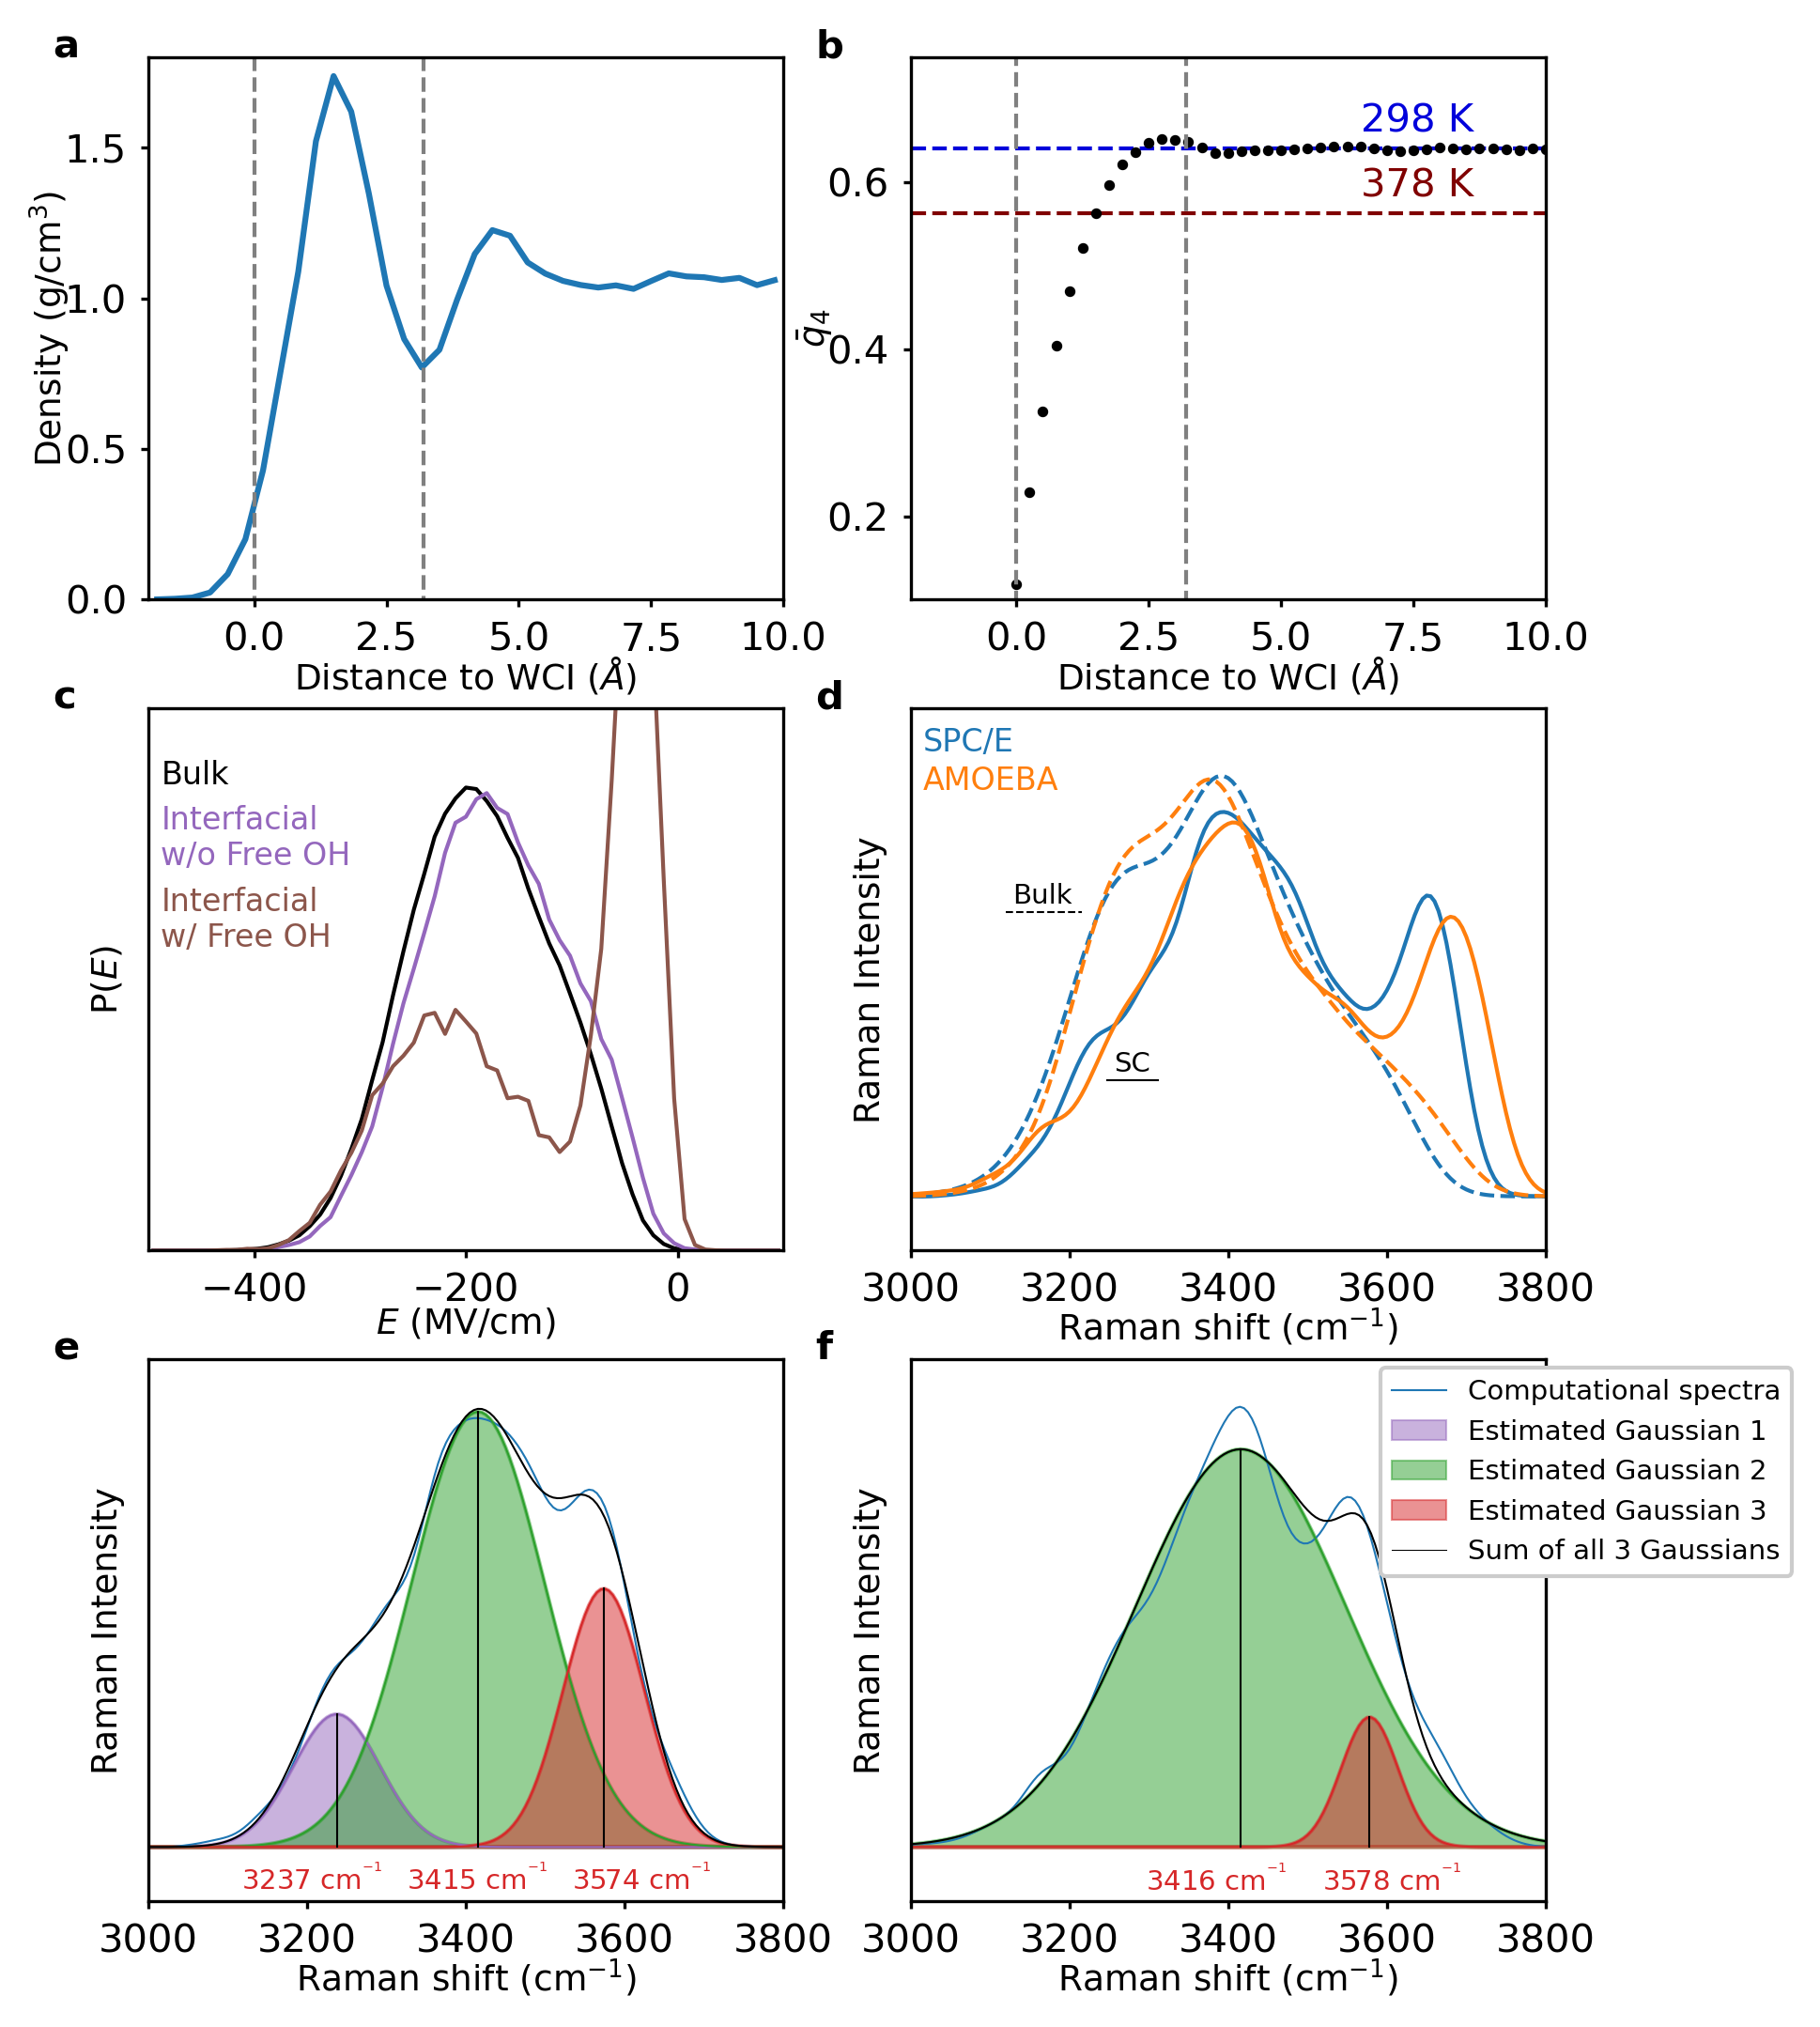

In [3]:
fs = 10
lw = 0.5


fig, axs = plt.subplots(3, 2, figsize=[6.4, 8.5], dpi=300)
labels2 = ['278.15 K', '298 K', '318 K', '338.15 K', '358.15 K', '378 K']
colors = pl.cm.seismic(np.linspace(0,1,6))



#Plot 00 and 01
density = spce_coco/spce_boxW/spce_binw/len(spce_iidis)/(1/18.02 * 6.022 * 10**23 / 10**24)
axs[0,0].plot(spce_unco, 
                 density, 
                 zorder=1)


np.savetxt("fig3a.csv", np.array([spce_unco, density]).T, delimiter=",")



axs[0,1].scatter(q4points[:,0], q4points[:,1], s=3, c='black', zorder=1)


np.savetxt("fig3b.csv", q4points[:,:2], delimiter=",")


for i in [1,  5]:
    axs[0,1].text(6.5, q4T[i] + 0.02, labels2[i], fontsize=fs, color = colors[i])
    axs[0,1].plot([-35, 30], [q4T[i], q4T[i]], color = colors[i], linestyle='dashed', linewidth=1,  zorder=-1)

for j in range(2):
    axs[0,j].plot([0]*2, [-1, 2], c='grey', linestyle='dashed', linewidth=1.0)
    axs[0,j].plot([3.2]*2, [-1, 2], c='grey', linestyle='dashed', linewidth=1.0)
    

#Plot 10
chere = ['black', 'C4', 'C5']
labels10 = ['Bulk', 'Interfacial\nw/o Free OH', 'Interfacial\nw/ Free OH']

fig3c = []

for i in range(3):
    #Divisor is a normalization factor, but is not important because I am not showing y-axis
    divisor = np.sum(spce_interface_fields[i+1]) * (spce_interface_fields[0][30] - spce_interface_fields[0][29])
    axs[1, 0].plot(spce_interface_fields[0]*100, spce_interface_fields[i+1]/divisor, linewidth=1.0, c=chere[i])
    

    
    fig3c.append(spce_interface_fields[i+1]/divisor)
    
fig3c.insert(0, spce_interface_fields[0]*100)

np.savetxt("fig3c.csv", np.array(fig3c).T, delimiter=",")

for i in range(3):
    axs[1, 0].text(0.02, 0.86 - i*0.15, labels10[i],c=chere[i],fontsize=fs - 2,
              transform = axs[1, 0].transAxes)
    
    
# Plot 11
chere = ['C1', 'C5', 'C0']

xx = spce_noshift_sc[0]

axs[1, 1].plot(spce_shift_sc[0], spce_noshift_sc[1], c = chere[2], linewidth=1.0)
axs[1, 1].plot(spce_shift_sc[0], spce_collect1[4], c = chere[2], linestyle='dashed', alpha=1.0, linewidth=1.0)


axs[1, 1].plot(amoeba_shift_sc[0], amoeba_noshift_sc[1], c = chere[0], linewidth=1.0)
axs[1, 1].plot(amoeba_shift_sc[0], amoeba_collect1[4], c = chere[0], linestyle='dashed', alpha=1.0, linewidth=1.0)

labels11 = ['SPC/E', 'AMOEBA']


axs[1, 1].text(0.02, 0.92, labels11[0],c=chere[2],fontsize=fs - 2,
              transform = axs[1, 1].transAxes)
axs[1, 1].text(0.02, 0.85, labels11[1],c=chere[0],fontsize=fs-2,
              transform = axs[1, 1].transAxes)


xbulk = 0.16
ybulk = 0.64
xsc = 0.32
ysc = 0.33

axs[1, 1].text(xbulk, ybulk, 'Bulk',fontsize=fs - 3,
              transform = axs[1, 1].transAxes)
axs[1, 1].text(xsc, ysc, 'SC', fontsize=fs-3,
              transform = axs[1, 1].transAxes)

axs[1, 1].plot([xbulk - 0.01, xbulk + 0.11], 
            [ybulk-0.015, ybulk-0.015], 
            transform = axs[1, 1].transAxes, 
            c='black', 
            linewidth=0.5,
            linestyle='dashed')
    
axs[1, 1].plot([xsc - 0.01, xsc + 0.07], 
            [ysc-0.015, ysc-0.015], 
            transform = axs[1, 1].transAxes, 
            c='black', 
            linewidth=0.5,
            )

fig3d = np.array([spce_shift_sc[0],
                  spce_collect1[4],
                  amoeba_collect1[4],
                  spce_noshift_sc[1],
                  amoeba_noshift_sc[1],
                ]).T

np.savetxt("fig3d.csv", fig3d, delimiter=",")

#Plot 21

axs[2, 0].plot(spce_shift_sc[0], spce_shift_sc[1], c='C0', linewidth=lw)

fig3ef = np.array([spce_shift_sc[0], spce_shift_sc[1], amoeba_shift_sc[1]]).T
np.savetxt("fig3ef.csv", fig3ef, delimiter=",")


xx = spce_shift_sc[0]
alterparam = np.copy(spce_sc_param)
alterparam[1:3] = 0
yy = curve(xx, *alterparam)
axs[2, 0].plot(xx, yy, c='C4', linewidth=lw)
axs[2, 0].fill_between(xx, yy, 0, color='C4', alpha = 0.5)
yy2 = np.copy(yy)

alterparam = np.copy(spce_sc_param)
alterparam[[0, 2]] = 0
yy = curve(xx, *alterparam)
yy1 = np.copy(yy)
axs[2, 0].plot(xx, yy, c='C2', linewidth=lw)
axs[2, 0].fill_between(xx, yy, 0, color='C2', alpha = 0.5)


alterparam = np.copy(spce_sc_param)
alterparam[:2] = 0
yy = curve(xx, *alterparam)
axs[2, 0].plot(xx, yy, c='C3', linewidth=lw)
axs[2, 0].fill_between(xx, yy, 0, color='C3', alpha = 0.5)

axs[2, 0].plot(xx, yy1 + yy2 + yy, c='black', linewidth=lw)


axs[2, 0].plot([spce_sc_param[4]]*2, [0, np.max(yy1)], c='black', linewidth=lw)
axs[2, 0].plot([spce_sc_param[5]]*2, [0, np.max(yy)], c='black', linewidth=lw)
axs[2, 0].plot([spce_sc_param[3]]*2, [0, np.max(yy2)], c='black', linewidth=lw)




axs[2, 0].text(spce_sc_param[4]-90, -np.max(spce_shift_sc[1])/10,
            str(int(np.round(spce_sc_param[4], 0))) + ' cm$^{^{-1}}$', fontsize=fs-3, c='tab:red')
axs[2, 0].text(spce_sc_param[5]-40, -np.max(spce_shift_sc[1])/10,
            str(int(np.round(spce_sc_param[5], 0))) + ' cm$^{^{-1}}$', fontsize=fs-3, c='tab:red')
axs[2, 0].text(spce_sc_param[3]-120, -np.max(spce_shift_sc[1])/10,
            str(int(np.round(spce_sc_param[3], 0))) + ' cm$^{^{-1}}$', fontsize=fs-3, c='tab:red')


#Plot 22

axs[2, 1].plot(amoeba_shift_sc[0], amoeba_shift_sc[1], c='C0', linewidth=lw)

xx = spce_shift_sc[0]
alterparam = np.copy(amoeba_sc_param)
alterparam[1:3] = 0
yy = curve(xx, *alterparam)
#axs[1, 1].plot(xx, yy, c='C4', linewidth=lw)
#axs[1, 1].fill_between(xx, yy, 0, color='C4', alpha = 0.5)
yy2 = np.copy(yy)

alterparam = np.copy(amoeba_sc_param)
alterparam[[0, 2]] = 0
yy = curve(xx, *alterparam)
yy1 = np.copy(yy)
axs[2, 1].plot(xx, yy, c='C2', linewidth=lw)
axs[2, 1].fill_between(xx, yy, 0, color='C2', alpha = 0.5)


alterparam = np.copy(amoeba_sc_param)
alterparam[:2] = 0
yy = curve(xx, *alterparam)
axs[2, 1].plot(xx, yy, c='C3', linewidth=lw)
axs[2, 1].fill_between(xx, yy, 0, color='C3', alpha = 0.5)

axs[2, 1].plot(xx, yy1 + yy2 + yy, c='black', linewidth=lw)


axs[2, 1].plot([amoeba_sc_param[4]]*2, [0, np.max(yy1)], c='black', linewidth=lw)
axs[2, 1].plot([amoeba_sc_param[5]]*2, [0, np.max(yy)], c='black', linewidth=lw)
axs[2, 1].plot([amoeba_sc_param[3]]*2, [0, np.max(yy2)], c='black', linewidth=lw)


axs[2, 1].text(amoeba_sc_param[4]-120, -np.max(amoeba_shift_sc[1])/10,
            str(int(np.round(amoeba_sc_param[4], 0))) + ' cm$^{^{-1}}$', fontsize=fs-3, c='tab:red')
axs[2, 1].text(amoeba_sc_param[5]-60, -np.max(amoeba_shift_sc[1])/10,
            str(int(np.round(amoeba_sc_param[5], 0))) + ' cm$^{^{-1}}$', fontsize=fs-3, c='tab:red')


point1 = np.array([1, 1])
point2 = np.array([2, 2])
axs[2,1].plot(point1, point2, c='C0',  alpha=1.0, linewidth=lw, label='Computational spectra')
axs[2,1].fill_between(point1, point2, color='C4',  alpha=0.5, linewidth=lw, label='Estimated Gaussian 1')
axs[2,1].fill_between(point1, point2, color='C2',  alpha=0.5, linewidth=lw, label='Estimated Gaussian 2')
axs[2,1].fill_between(point1, point2, color='C3',  alpha=0.5, linewidth=lw, label='Estimated Gaussian 3')
axs[2,1].plot(point1, point2, c='black',  alpha=1.0, linewidth=lw/2, label='Sum of all 3 Gaussians')
axs[2,1].legend(fontsize=fs-3, loc=[0.74, 0.6], framealpha=1)

# Figure Details


xlims = [[[-2, 10],[-2, 10]],
         [[-500, 100],[3000, 3800]],
         [[3000, 3800],[3000, 3800]]
        ]


ylims = [[[0, 1.8],[0.1, 0.75]],
         [[0, 0.65],[-0.002, 0.018]],
         [[-0.0019, 0.017], [-0.0019, 0.017]]
        ]


xlabels = [['Distance to WCI ($\AA$)','Distance to WCI ($\AA$)'],
         ['$E$ (MV/cm)','Raman shift (cm$^{-1}$)'],
         ['Raman shift (cm$^{-1}$)', 'Raman shift (cm$^{-1}$)']
        ]


ylabels = [['Density (g/cm$^3$)','$\\bar{q}_4}$'],
         ["P($E$)",'Raman Intensity'],
         ['Raman Intensity','Raman Intensity']
        ]


for i in range(3):
    for j in range(2):
        axs[i,j].set_xlabel(xlabels[i][j], fontsize=fs-1, labelpad = -1)
        axs[i,j].set_ylabel(ylabels[i][j], fontsize=fs-1, labelpad = -2)
        axs[i,j].set_xlim(xlims[i][j][0], xlims[i][j][1])
        axs[i,j].set_ylim(ylims[i][j][0], ylims[i][j][1])
        axs[i,j].tick_params(size=2, labelsize=fs)
        
        
        if i > 0:
            axs[i,j].set_yticks([])
            axs[i,j].set_ylabel(ylabels[i][j], fontsize=fs-1, labelpad = 4)

        
        
axs[0,0].text(-0.15, 1.0, 'a', transform=axs[0,0].transAxes, weight="bold")
axs[0,1].text(-0.15, 1.0, 'b', transform=axs[0,1].transAxes, zorder=1, weight="bold")
axs[1,0].text(-0.15, 1.0, 'c', transform=axs[1,0].transAxes, zorder=1, weight="bold")
axs[1,1].text(-0.15, 1.0, 'd', transform=axs[1,1].transAxes, zorder=1, weight="bold")
axs[2,0].text(-0.15, 1.0, 'e', transform=axs[2,0].transAxes, zorder=1, weight="bold")
axs[2,1].text(-0.15, 1.0, 'f', transform=axs[2,1].transAxes, zorder=1, weight="bold")

Text(-0.15, 1.0, 'b')

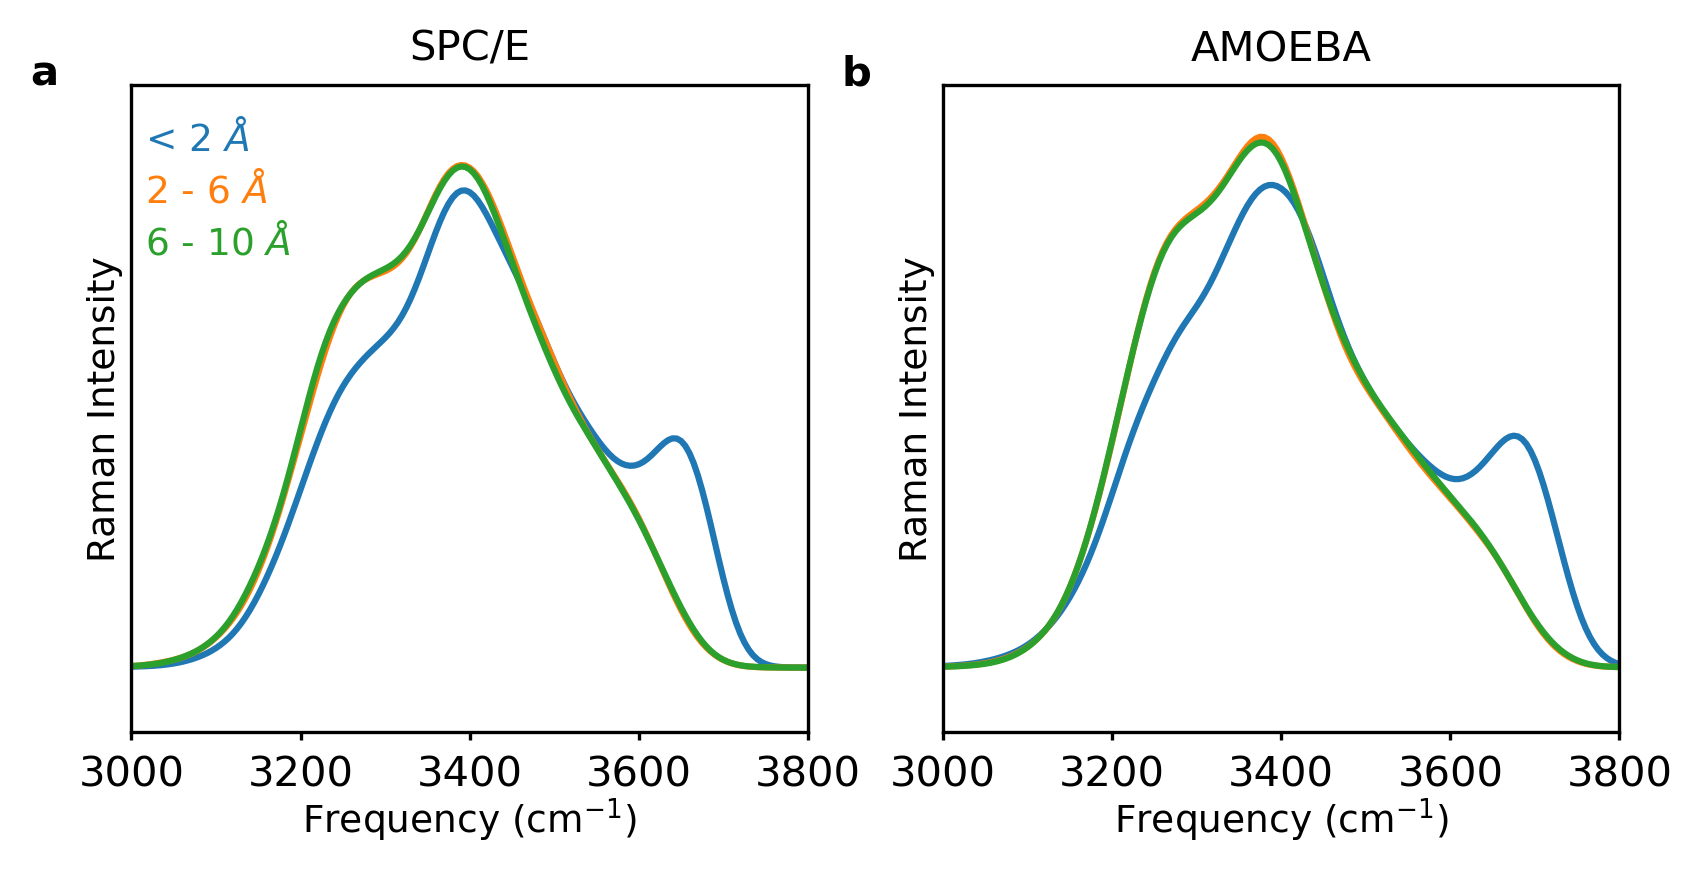

In [4]:
fig, axs = plt.subplots(1, 2, figsize=[6.4, 2.8], dpi=300)

for i in range(3):
    axs[0].plot(spce_collect1[0], spce_collect1[i+1])
    
    axs[1].plot(spce_collect1[0], amoeba_collect1[i+1])


xlims =  [[3000, 3800], [3000, 3800]]  
ylims =  [[-0.002, 0.018], [-0.0019, 0.017], [-0.0019, 0.017]]


ylabels = ['Raman Intensity', 'Raman Intensity', 'Raman Intensity']

xlabels = ['Frequency (cm$^{-1}$)', 'Frequency (cm$^{-1}$)']

yticks = [[], [], []]
chere = ['C0', 'C1', 'C2']

  
    
for i in range(0,2):
    axs[i].set_xlabel(xlabels[i], fontsize=fs-1, labelpad = 0)
    axs[i].set_ylabel(ylabels[i], fontsize=fs-1, labelpad = 0)
    axs[i].set_xlim(xlims[i][0], xlims[i][1])
    axs[i].set_ylim(ylims[i][0], ylims[i][1])
    axs[i].set_yticks(yticks[i])
    axs[i].tick_params(size=2, labelsize=fs) 
    
    
axs[0].set_title("SPC/E", fontsize=fs)
axs[1].set_title("AMOEBA", fontsize=fs)

labels= ['< 2 $\AA$', '2 - 6 $\AA$', '6 - 10 $\AA$']


for i in range(3):
    axs[0].text(0.02, 0.9 - i*0.08, labels[i],c=chere[i],fontsize=fs - 1,
              transform = axs[0].transAxes)
    
    
axs[0].text(-0.15, 1.0, 'a', transform=axs[0].transAxes, weight="bold")
axs[1].text(-0.15, 1.0, 'b', transform=axs[1].transAxes, zorder=1, weight="bold")

In [5]:

# Correletions between Frequency and q4
spce_q4_correlation = np.load("../spce_interface/q4_freq_correlation.npy")
amoeba_q4_correlation = np.load("../amoeba_interface/amoebaq4_freq_correlation.npy")


q4s = np.linspace(-0.2, 1.0, 13)

binw = q4s[1] - q4s[0]

avg_spce = []
std_spce = []

for x in q4s:
    q4w = np.where(np.abs(spce_q4_correlation[0] - x) < binw/2)
    avg_spce.append(np.average(spce_q4_correlation[1][q4w]))
    std_spce.append(np.std(spce_q4_correlation[1][q4w]))

avg_amoeba = []
std_amoeba = []

for x in q4s:
    q4w = np.where(np.abs(amoeba_q4_correlation[0] - x) < binw/2)
    avg_amoeba.append(np.average(amoeba_q4_correlation[1][q4w]))
    std_amoeba.append(np.std(amoeba_q4_correlation[1][q4w]))



Text(-0.15, 1.0, 'd')

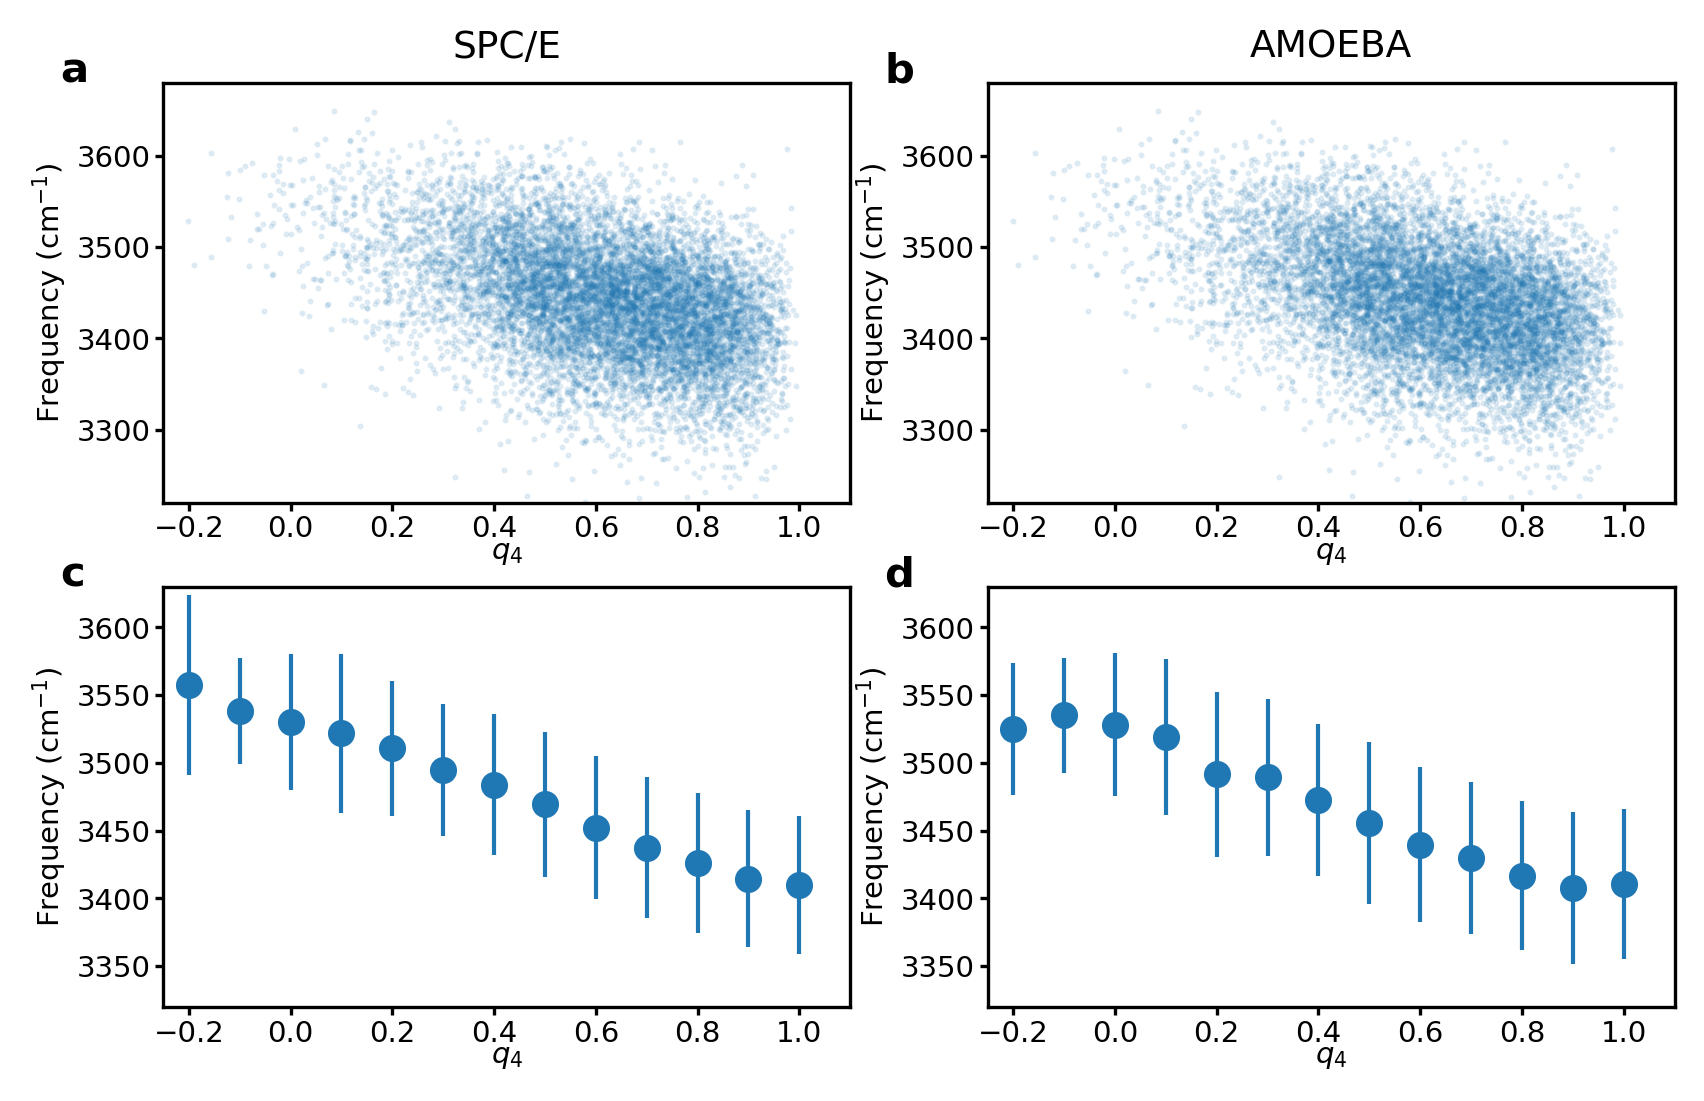

In [6]:
fs=9

fig, axs = plt.subplots(2, 2, figsize=[6.5, 4.0], dpi=300)

axs[0,0].scatter(spce_q4_correlation[0], spce_q4_correlation[1], c='C0', linewidth=lw, alpha=0.1, s=1)
axs[0,1].scatter(spce_q4_correlation[0], spce_q4_correlation[1], c='C0', linewidth=lw, alpha=0.1, s=1)

axs[1,0].scatter(q4s, avg_amoeba, c='C0', linewidth=lw, alpha=1.0)
axs[1,0].errorbar(q4s, avg_amoeba, yerr = std_amoeba, linewidth=0, elinewidth=1.0)
axs[1,1].scatter(q4s, avg_spce, c='C0', linewidth=lw, alpha=1.0)
axs[1,1].errorbar(q4s, avg_spce, yerr = std_spce, linewidth=0, elinewidth=1.0)


xlim = [-0.25, 1.1]
ylim = [[3220, 3680], [3320, 3630]]
ylabel = 'Frequency (cm$^{-1}$)'
xlabel = '$q_4$'

for i in range(2):
    for j in range(2):
        axs[j,i].set_xlabel(xlabel, fontsize=fs-2, labelpad = -1)
        axs[j,i].set_ylabel(ylabel, fontsize=fs-2, labelpad = 2)
        axs[j,i].set_xlim(xlim[0], xlim[1])
        axs[j,i].set_ylim(ylim[j][0], ylim[j][1])
        axs[j,i].tick_params(size=2, labelsize=fs-2, pad=1)





axs[0,0].set_title('SPC/E', fontsize=fs)
axs[0,1].set_title('AMOEBA', fontsize=fs)



axs[0,0].text(-0.15, 1.0, 'a', transform=axs[0,0].transAxes, weight="bold")
axs[0,1].text(-0.15, 1.0, 'b', transform=axs[0,1].transAxes, zorder=1, weight="bold")
axs[1,0].text(-0.15, 1.0, 'c', transform=axs[1,0].transAxes, zorder=1, weight="bold")
axs[1,1].text(-0.15, 1.0, 'd', transform=axs[1,1].transAxes, zorder=1, weight="bold")

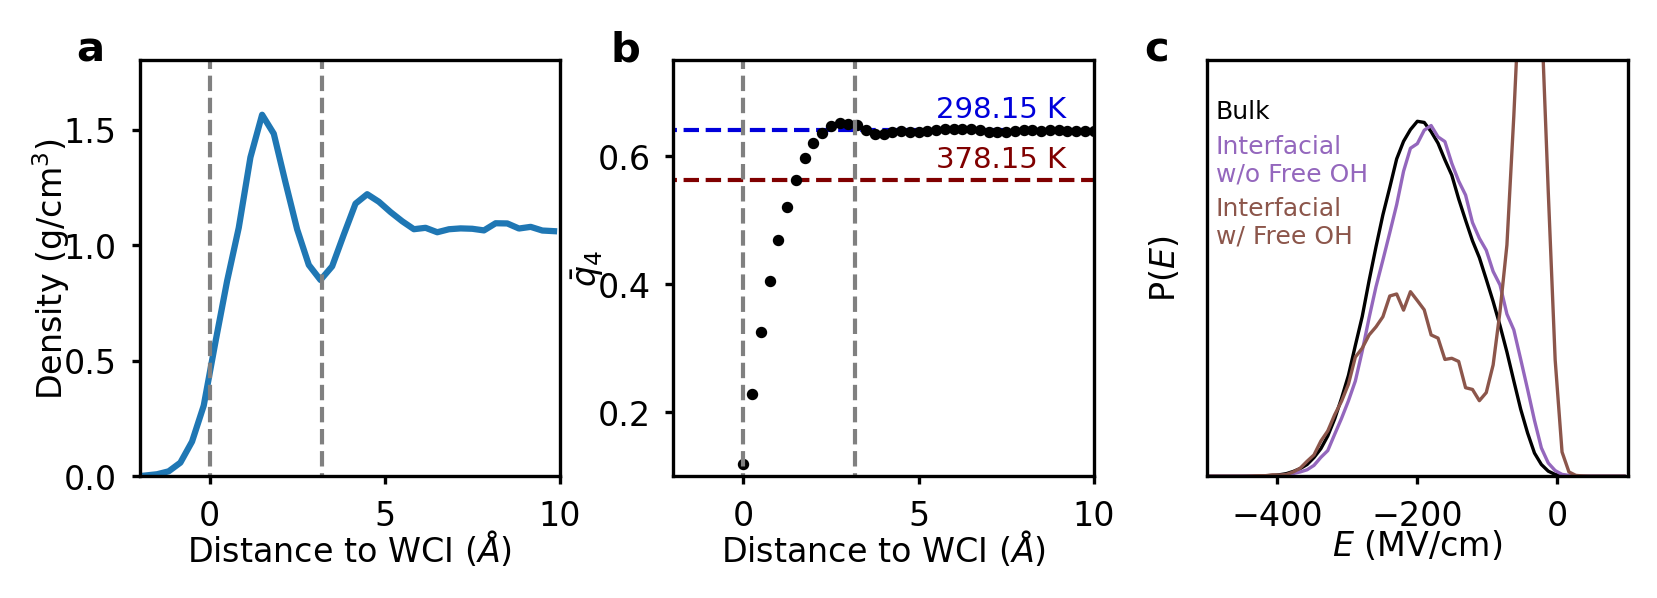

In [7]:
s = 10
lw = 0.5


fig, axs = plt.subplots(1, 3, figsize=[6.4, 1.8], dpi=300)




labels2 = ['278.15 K', '298.15 K', '318.15 K', '338.15 K', '358.15 K', '378.15 K']
colors = pl.cm.seismic(np.linspace(0,1,6))



density = amoeba_coco/amoeba_boxW/amoeba_binw/len(amoeba_iidis)/(1/18.02 * 6.022 * 10**23 / 10**24)
axs[0].plot(amoeba_unco, 
                 density, 
                 #linewdith=lw,
                 zorder=1)





axs[1].scatter(q4points[:,0], q4points[:,1], s=3, c='black', zorder=1)




for i in [1,  5]:
    axs[1].text(5.5, q4T[i] + 0.02, labels2[i], fontsize=fs-2, color = colors[i])
    axs[1].plot([-35, 30], [q4T[i], q4T[i]], color = colors[i], linestyle='dashed', linewidth=1,  zorder=-1)

for j in range(2):
    axs[j].plot([0]*2, [-1, 2], c='grey', linestyle='dashed', linewidth=1.0)
    axs[j].plot([3.2]*2, [-1, 2], c='grey', linestyle='dashed', linewidth=1.0)
    

    

#Plot 01
chere = ['black', 'C4', 'C5']
labels10 = ['Bulk', 'Interfacial\nw/o Free OH', 'Interfacial\nw/ Free OH']


for i in range(3):
    divisor = np.sum(spce_interface_fields[i+1]) * (spce_interface_fields[0][30] - spce_interface_fields[0][29])
    axs[2].plot(spce_interface_fields[0]*100, spce_interface_fields[i+1]/divisor, linewidth=0.8, c=chere[i])
    

for i in range(3):
    axs[2].text(0.02, 0.86 - i*0.15, labels10[i],c=chere[i],fontsize=fs - 3,
              transform = axs[2].transAxes)
    
    

xlims = [[-2, 10],
         [-2, 10],
         [-500, 100]]


ylims = [[0, 1.8],
         [0.1, 0.75],
         [0, 0.65]
        ]


xlabels = ['Distance to WCI ($\AA$)',
            'Distance to WCI ($\AA$)',
            '$E$ (MV/cm)']
        


ylabels = ['Density (g/cm$^3$)',
           '$\\bar{q}_4}$',
           "P($E$)"]


for i in range(3):
        axs[i].set_xlabel(xlabels[i], fontsize=fs-1, labelpad = -1)
        axs[i].set_ylabel(ylabels[i], fontsize=fs-1, labelpad = -2)
        axs[i].set_xlim(xlims[i][0], xlims[i][1])
        axs[i].set_ylim(ylims[i][0], ylims[i][1])
        axs[i].tick_params(size=2, labelsize=fs-1)
        
        
        if i > 1:
            axs[i].set_yticks([])
            axs[i].set_ylabel(ylabels[i], fontsize=fs-1, labelpad = 4)
            
            
axs[0].text(-0.15, 1.0, 'a', transform=axs[0].transAxes, weight="bold")
axs[1].text(-0.15, 1.0, 'b', transform=axs[1].transAxes, zorder=1, weight="bold")
axs[2].text(-0.15, 1.0, 'c', transform=axs[2].transAxes, zorder=1, weight="bold")


plt.subplots_adjust(#left=0.1,
                    #bottom=0.0, 
                    #right=0.4, 
                    #top=0.0, 
                    wspace=0.27, 
                    hspace=0.0)